# Examples - Delayed - Basic Delayed example
https://gist.github.com/mrocklin/d009e5d4a1f49ecdb433107f3d72c7f3#file-pygotham-delayed-ipynb

## Wrap code with Dask.delayed

In [1]:
from time import sleep
import random

from dask import delayed

In [2]:
%%time

def add(x, y):
    sleep(1)
    return x + y

def inc(x):
    sleep(1)
    return x + 1

a = delayed(inc)(1)
b = delayed(inc)(2)
c = delayed(add)(a, b)

CPU times: user 553 µs, sys: 0 ns, total: 553 µs
Wall time: 562 µs


In [3]:
c

Delayed('add-dd4fcdf5-48dc-4847-9ae4-cedb0e6f782f')

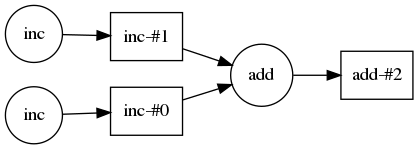

In [4]:
c.visualize(rankdir = 'LR')

In [5]:
%time c.compute()

CPU times: user 6.97 ms, sys: 0 ns, total: 6.97 ms
Wall time: 2.04 s


5

## Combine with loops

In [6]:
%%time

def inc(x):
    sleep(random.random())
    return x + 1

def double(x):
    sleep(random.random())
    return x + 2

def add(x, y):
    sleep(random.random())
    return x + y

data = [1, 2, 3, 4, 5, 6, 7, 8]

output = []
for x in data:
    a = delayed(inc)(x)
    b = delayed(double)(x)
    c = delayed(add)(a, b)
    output.append(c)

total = delayed(sum)(output)
total

CPU times: user 2.42 ms, sys: 0 ns, total: 2.42 ms
Wall time: 5.35 ms


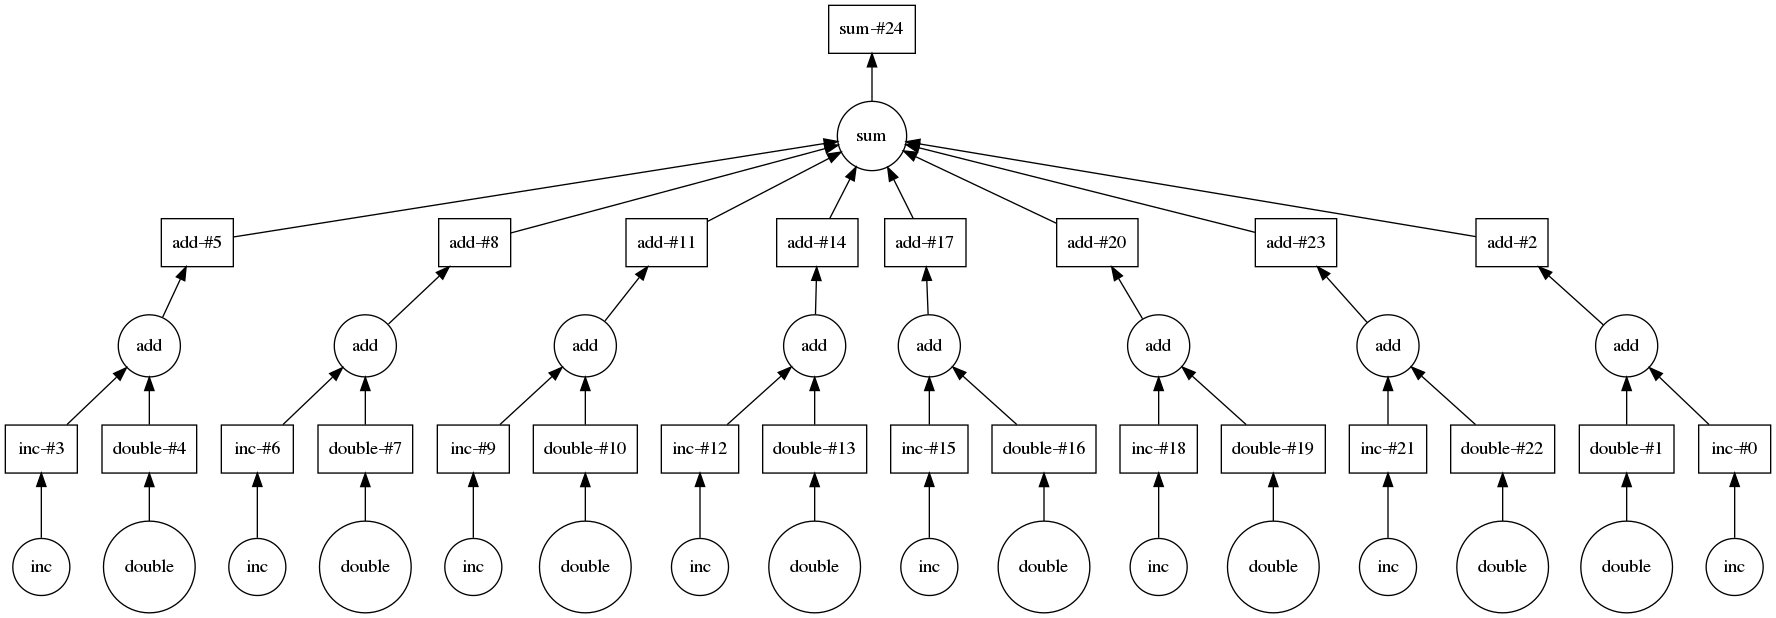

In [7]:
total.visualize()

In [8]:
%time total.compute()

CPU times: user 18 ms, sys: 0 ns, total: 18 ms
Wall time: 6.1 s


96

In [9]:
from dask.distributed import Client

e = Client(n_workers = 6, set_as_default=True)
e

Client Scheduler: tcp://127.0.0.1:38751 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 6 Cores: 6 Memory: 24.85 GB
